In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from math import sqrt
import time 
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook
from scipy import signal
import math
import scipy.optimize as optimize
import scipy.io as sio
import scipy.signal as signal
import itertools
from scipy.fftpack import fft, ifft
plt.style.use('seaborn')
import pickle
from scipy import stats
from zebra_chord import *
from collect_statistics import *
from visualization import *
from mpl_toolkits.mplot3d import Axes3D
import scipy

In [2]:
noise  = np.linspace(0, 1, 500)
dic = return_default_dic()
t = np.asarray([i*0.5 for i in range(4000)])

In [3]:
data = pickle.load(open("data_uncoupled_noisy.pkl", "rb"))

In [4]:
u_list, w_list, r_list = data

In [5]:
def get_qf_list(sig_list, cell_loc, type_method):
    if cell_loc == None:
        r_list = sig_list
    else:
        r_list = (np.asarray(sig_list)[:, cell_loc, :])
    qf_W = []
    for w in r_list:
        sample_signal = w
        if(type_method=="linear_interp"):
            qf = compute_qf_linear_interp(sample_signal)
        else:
            qf = curve_intersection_qf(sample_signal)
        qf_W.append(qf[0])
    return qf_W

def compute_qf_linear_interp(sig):
    freq, psd = scipy.signal.welch(sig)
    psd = 10*np.log10(psd)
    sig_max = np.amax(psd)
    y_line = sig_max - 3
    ind_g = np.where(psd > y_line)
    ind_l = np.where(psd < y_line)
    val_g = psd[ind_g]
    val_l = psd[ind_l]

    y_max = np.amax(val_g)
    y_2_max = np.amax(val_l)
    f_2_max = freq[np.where(psd == y_2_max)]
    f_max = freq[np.argmax(psd)]

    f_x = (f_max - f_2_max)*(y_line - y_max)/(y_max - y_2_max) + f_max
    y_x = (f_x - f_max)*(-y_2_max + y_max)/(f_max - f_2_max) + y_max
    qf = f_max/(2*(f_max - f_x))[0]
    return qf, y_x, y_max, y_2_max

def curve_intersection_qf(signal):
    freq, psd = scipy.signal.welch(signal)
    psd = 10*np.log10(psd)
    sig_max = np.amax(psd)
    y_line = sig_max - 3
    idx = np.argwhere(np.diff(np.sign(psd - y_line))).flatten()
    f_max = freq[np.argmax(psd)]
    freq_id = freq[idx[1]]
    return (f_max/2*(f_max-freq_id))

def plot_psd(sig, size_tup, type_plot, plot_cutoff=False):
    freq, psd = scipy.signal.welch(sig)
    fig, ax = plt.subplots(figsize=size_tup)
    psd = 10*np.log10(psd)
    ymax = np.amax(psd)
    if (plot_cutoff):
        ax.plot(freq,[ymax-3 for i in range(len(freq))])
    
    ax.set_ylabel("PSD")
    ax.set_xlabel("freq")
    if (type_plot=="line"):
        ax.plot(freq, psd)
    elif (type_plot=="scatter"):
        ax.scatter(freq, psd)
    else:
        ax.plot(freq, psd)
        ax.scatter(freq, psd)
    return fig, ax

4.920213103121364

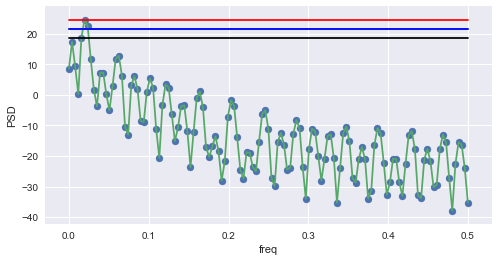

In [6]:
freq, psd = get_PSD_(w_list[3],20)
_, ax = plot_psd(w_list[3][20], (8,4), "both", plot_cutoff=True)
qf_l, y, y_max, y_2_max = compute_qf_linear_interp(w_list[3][20])
ax.plot(freq, [y for i in range(len(freq))] , c ="b")
ax.plot(freq, [y_max for i in range(len(freq))],c = "r" )
ax.plot(freq, [y_2_max for i in range(len(freq))], c = "k")

qf_l

In [7]:
"""def compute_qf_linear_interp(sig):
    freq, psd = scipy.signal.welch(sig)
    psd = 10*np.log10(psd)
    sig_max = np.amax(psd)
    max_occur = np.argmax(psd)
    left_y_max = psd[:max_occur]
    
    y_line = sig_max - 3
    ind_g = np.where(psd > y_line)
    ind_l = np.where(left_y_max < y_line)
    val_g = psd[ind_g]
    val_l = left_y_max[ind_l]
    
    y_max = np.amax(val_g)
    y_2_max = np.amax(val_l)
    f_2_max = freq[np.where(psd == y_2_max)]
    f_max = freq[np.argmax(psd)]

    f_x = (f_max - f_2_max)*(y_line - y_max)/(y_max - y_2_max) + f_max
    y_x = (f_x - f_max)*(-y_2_max + y_max)/(f_max - f_2_max) + y_max
    qf = f_max/(2*(f_max - f_x))[0]
    return qf, y_x, y_max, y_2_max"""

'def compute_qf_linear_interp(sig):\n    freq, psd = scipy.signal.welch(sig)\n    psd = 10*np.log10(psd)\n    sig_max = np.amax(psd)\n    max_occur = np.argmax(psd)\n    left_y_max = psd[:max_occur]\n    \n    y_line = sig_max - 3\n    ind_g = np.where(psd > y_line)\n    ind_l = np.where(left_y_max < y_line)\n    val_g = psd[ind_g]\n    val_l = left_y_max[ind_l]\n    \n    y_max = np.amax(val_g)\n    y_2_max = np.amax(val_l)\n    f_2_max = freq[np.where(psd == y_2_max)]\n    f_max = freq[np.argmax(psd)]\n\n    f_x = (f_max - f_2_max)*(y_line - y_max)/(y_max - y_2_max) + f_max\n    y_x = (f_x - f_max)*(-y_2_max + y_max)/(f_max - f_2_max) + y_max\n    qf = f_max/(2*(f_max - f_x))[0]\n    return qf, y_x, y_max, y_2_max'

In [8]:
qf_W = get_qf_list(w_list, 30, "linear_interp")

Text(0, 0.5, 'qf')

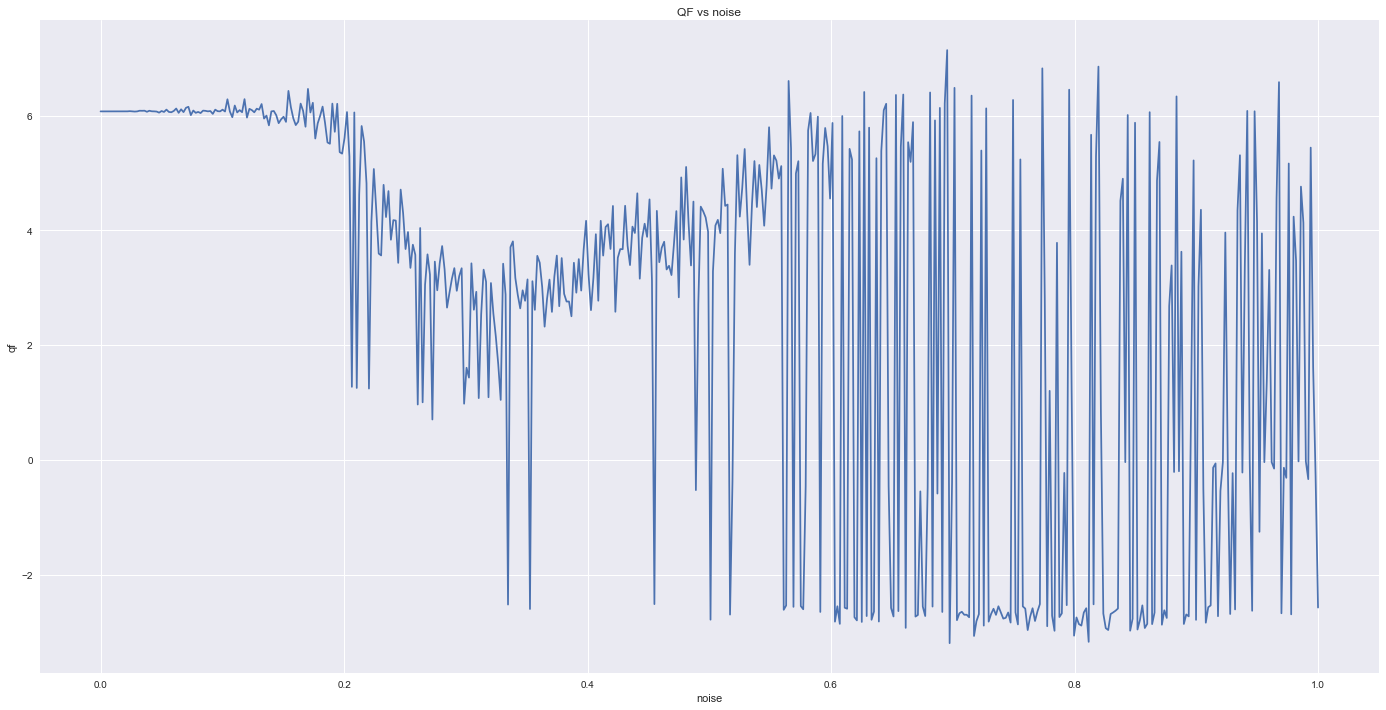

In [9]:
qf_W = get_qf_list(w_list, 30, "linear_interp")
plt.figure(figsize=(24, 12))
plt.plot(noise, qf_W)
plt.title("QF vs noise")
plt.xlabel("noise")
plt.ylabel("qf")

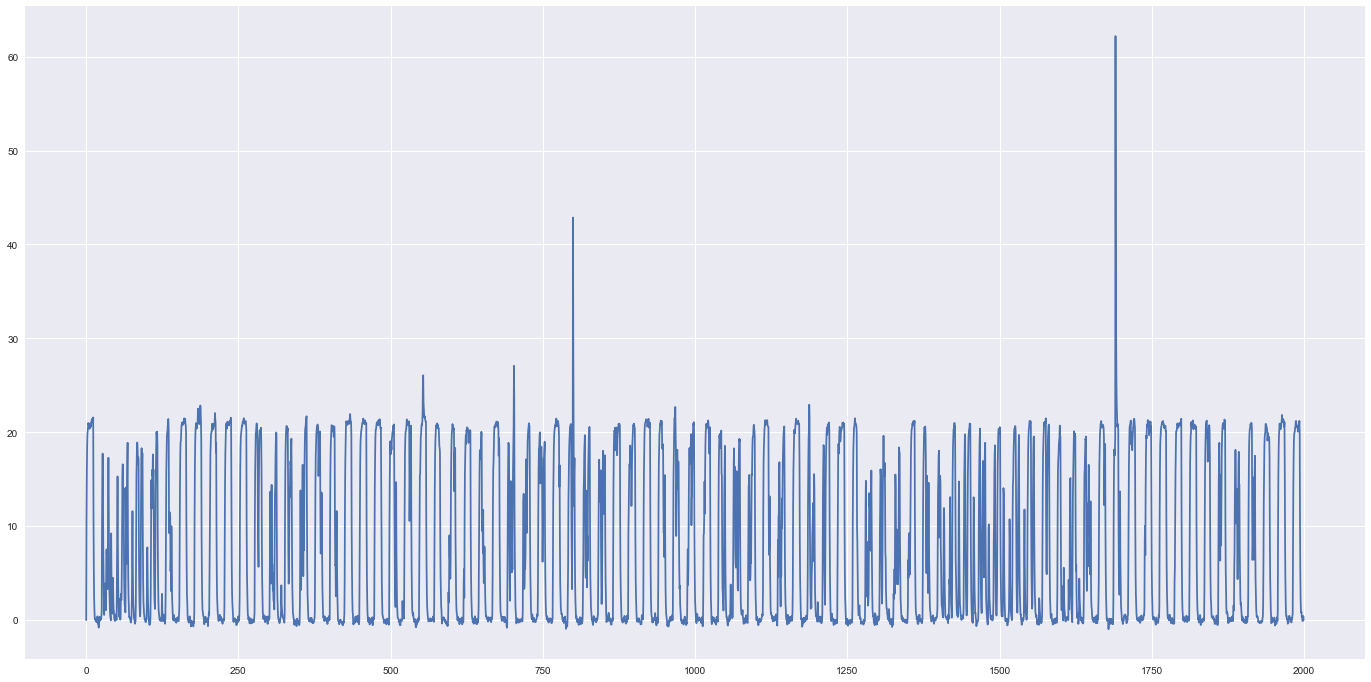

In [10]:
w_max = w_list[347][30]
plt.figure(figsize=(24, 12))
plt.plot(t,w_max)

In [11]:
def compute_qf_plotted(w_max):
    freq, psd = scipy.signal.welch(w_max)
    psd = 10*np.log10(psd)
    sig_max = np.amax(psd)
    fig, ax = plt.subplots(figsize=(24, 12))
    
    ymax_below_cutoff = np.amax(psd[np.where(psd<sig_max-3)])

    fm = freq[np.argmax(psd)]
    f2m = freq[np.where(psd == ymax_below_cutoff)]
    ym = sig_max
    y2m = ymax_below_cutoff
    yi = sig_max-3
    fi = (f2m-fm)*(yi-ym)/(y2m-ym)+fm
    yii = (fi-fm)*(y2m-ym)/(f2m-fm) + ym
    
    ax.plot(freq, psd)
    ax.scatter(freq, psd)

    ax.plot(freq, [sig_max for i in range(len(freq))], c = "g")
    ax.plot(freq, [sig_max-3 for i in range(len(freq))], c = "r")
    ax.plot(freq, [ymax_below_cutoff for i in range(len(freq))], c = "k")
    ax.plot(freq, [yii for i in range(len(freq))], c = "b")
    return (fm/2*(fm-fi))

array([0.00013496])

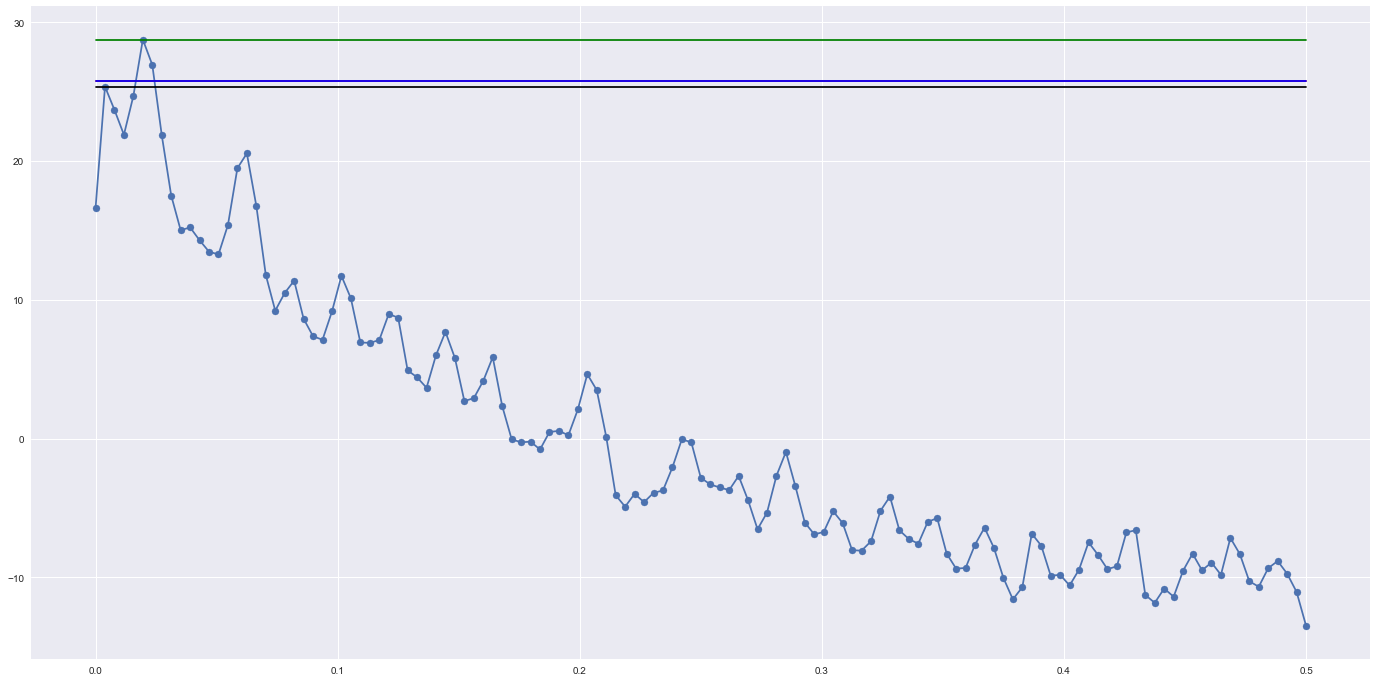

In [12]:
compute_qf_plotted(w_list[136][30])

In [13]:
def compute_qf_(w_max):
    freq, psd = scipy.signal.welch(w_max)
    psd = 10*np.log10(psd)
    sig_max = np.amax(psd)


    ymax_below_cutoff = np.amax(psd[np.where(psd<sig_max-3)])

    fm = freq[np.argmax(psd)]
    f2m = freq[np.where(psd == ymax_below_cutoff)]
    ym = sig_max
    y2m = ymax_below_cutoff
    yi = sig_max-3
    fi = (f2m-fm)*(yi-ym)/(y2m-ym)+fm
    yii = (fi-fm)*(y2m-ym)/(f2m-fm) + ym
    return (fm/2*(fm-fi))

In [14]:
compute_qf_(w_list[136][30])

array([0.00013496])

In [18]:
qf_w=[]
for w in u_list:
    qf_w.append(compute_qf_(w[30]))

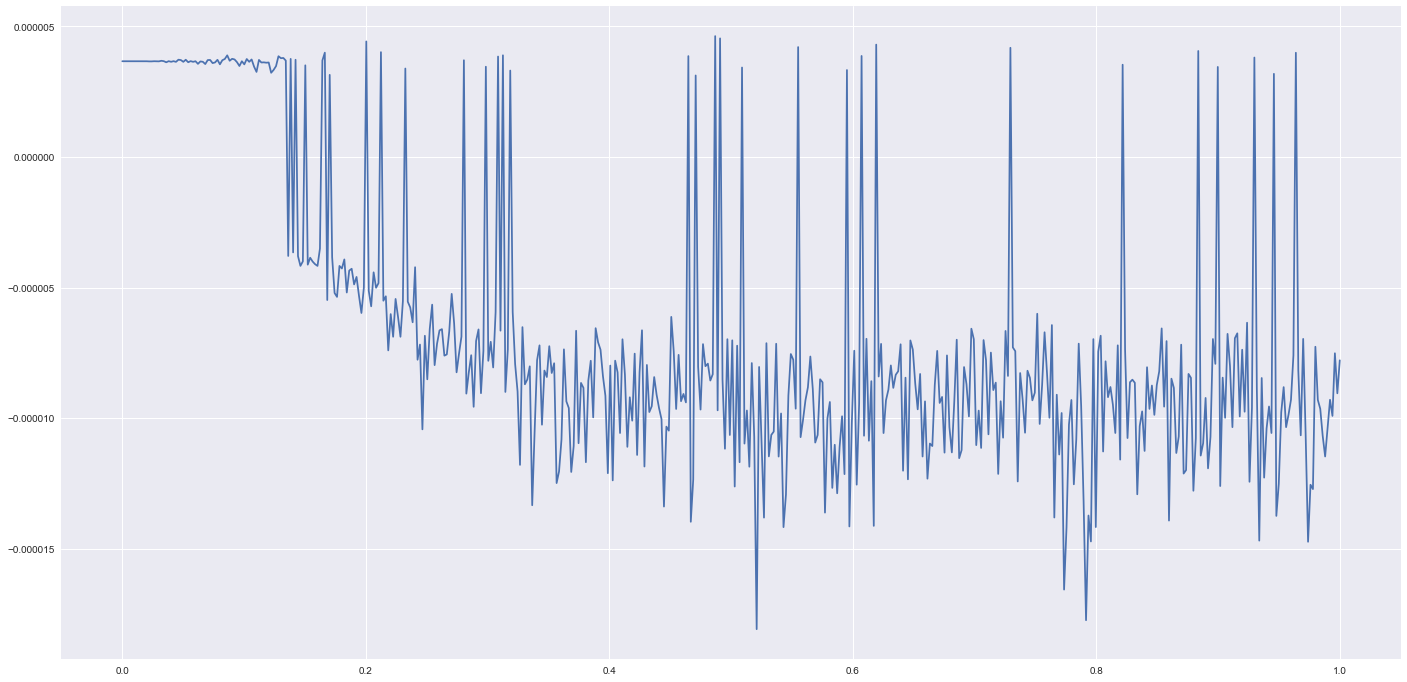

In [19]:
plt.figure(figsize=(24, 12))
plt.plot(noise, qf_w)

In [17]:
np.argmax(qf_w), np.amax(qf_w)

(136, 0.00013496114702967656)

In [142]:
len(w_list)

500